 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [132]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [59]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [60]:
# Count nulls
print(whale_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [76]:
# Drop nulls
whale_returns.dropna(inplace = True)
print(whale_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [78]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)

In [79]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [80]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [81]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [82]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [83]:
# Fix Data Types
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace('$','').astype("string")
sp_tsx_history["Close"]= sp_tsx_history["Close"].str.replace(',','').astype("float")
sp_tsx_history.sort_index(inplace = True)
sp_tsx_history

/Users/tarunmidha/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [103]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history.pct_change()

In [104]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace = True)
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [111]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.columns = ["sp_tsx"]
sp_tsx_daily_returns.head()

,sp_tsx
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [112]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily = pd.concat([whale_returns, algo_returns,sp_tsx_daily_returns], axis = "columns",join = "inner")
df_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

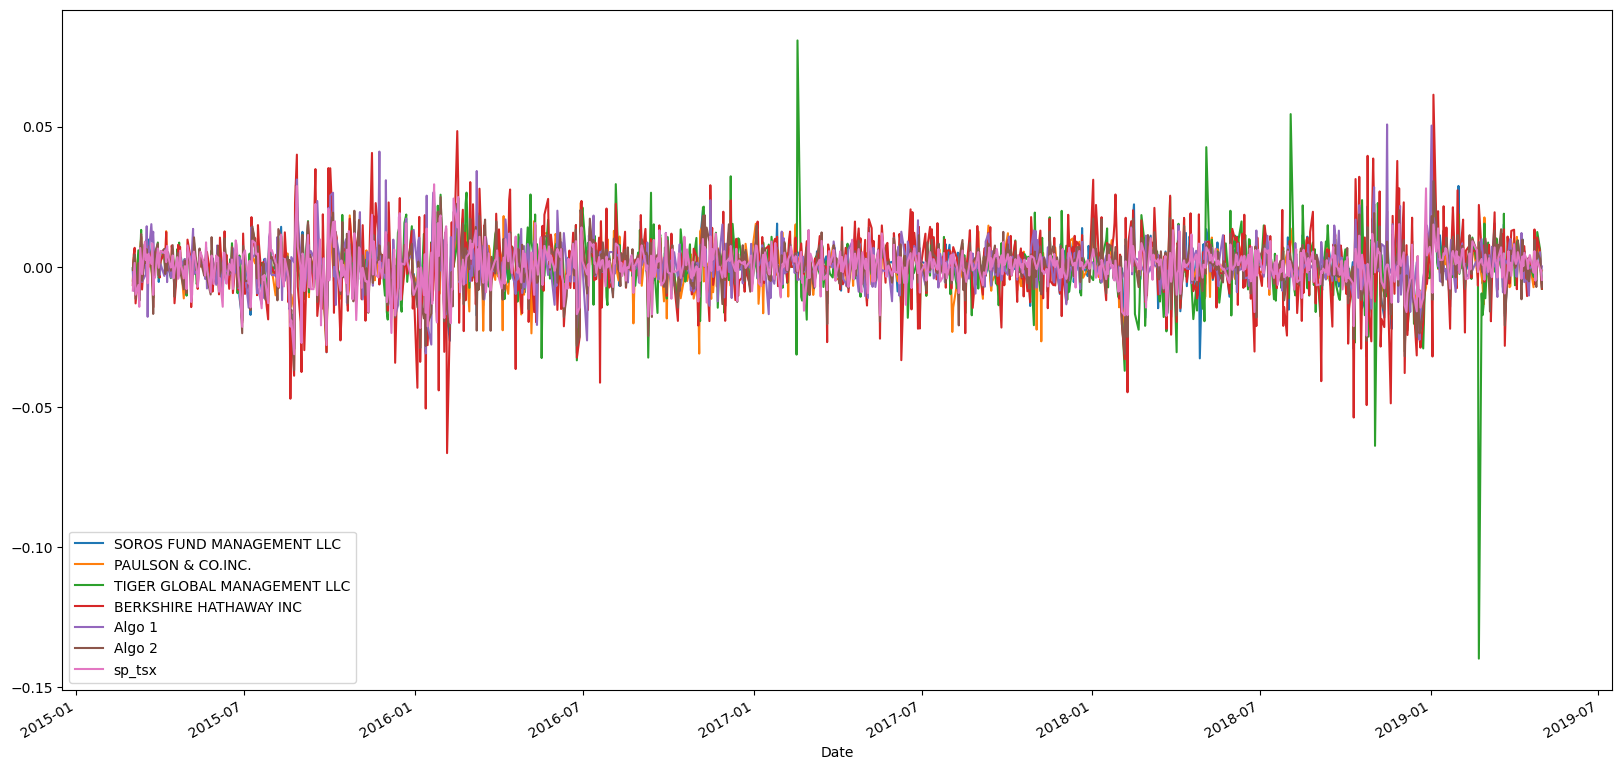

In [113]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

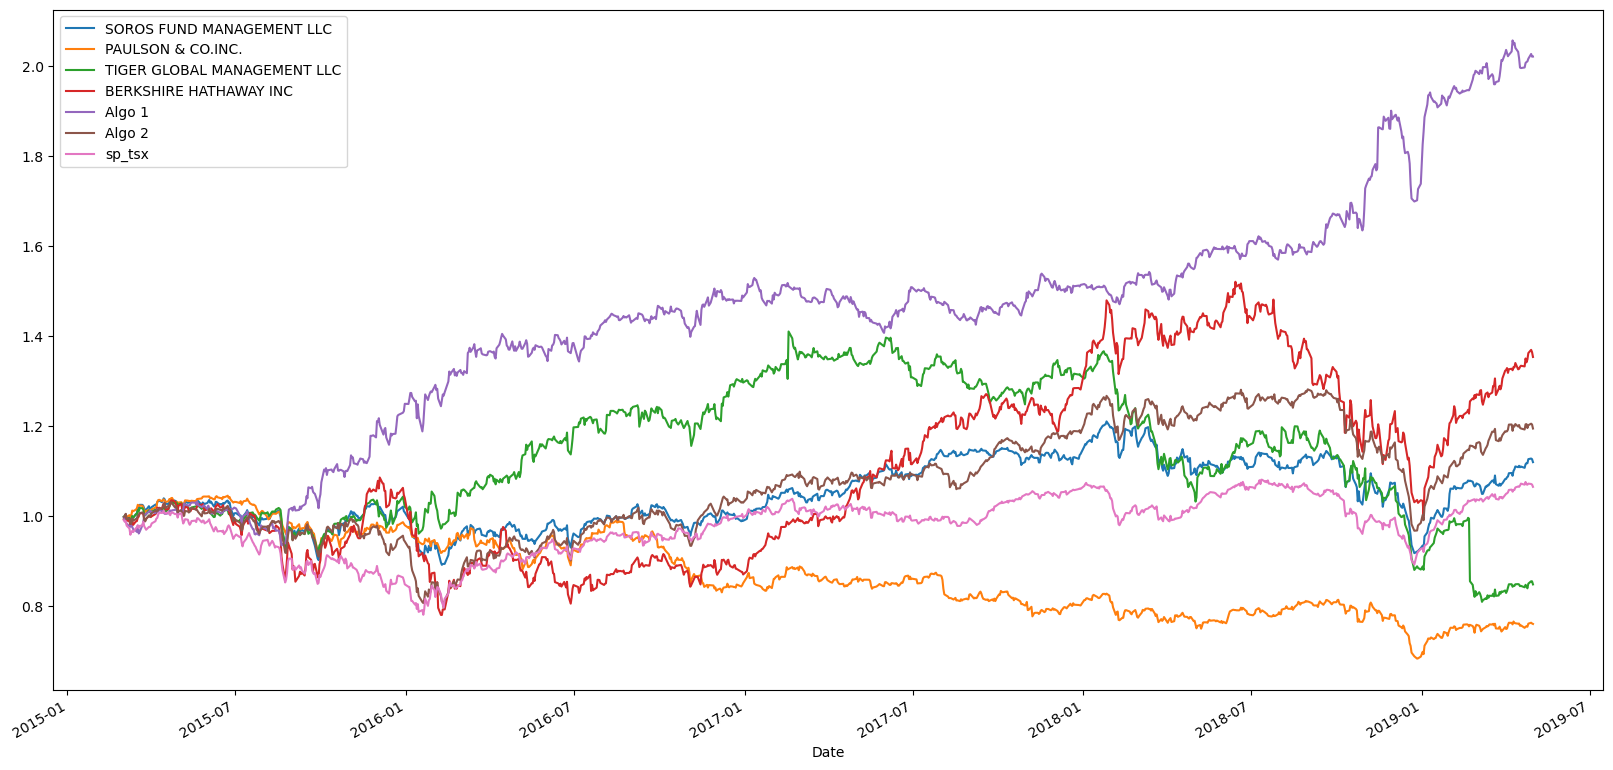

In [114]:
# Calculate cumulative returns of all portfolios
#cum_return = (1+df_daily).cumprod()-1
# Plot cumulative returns
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

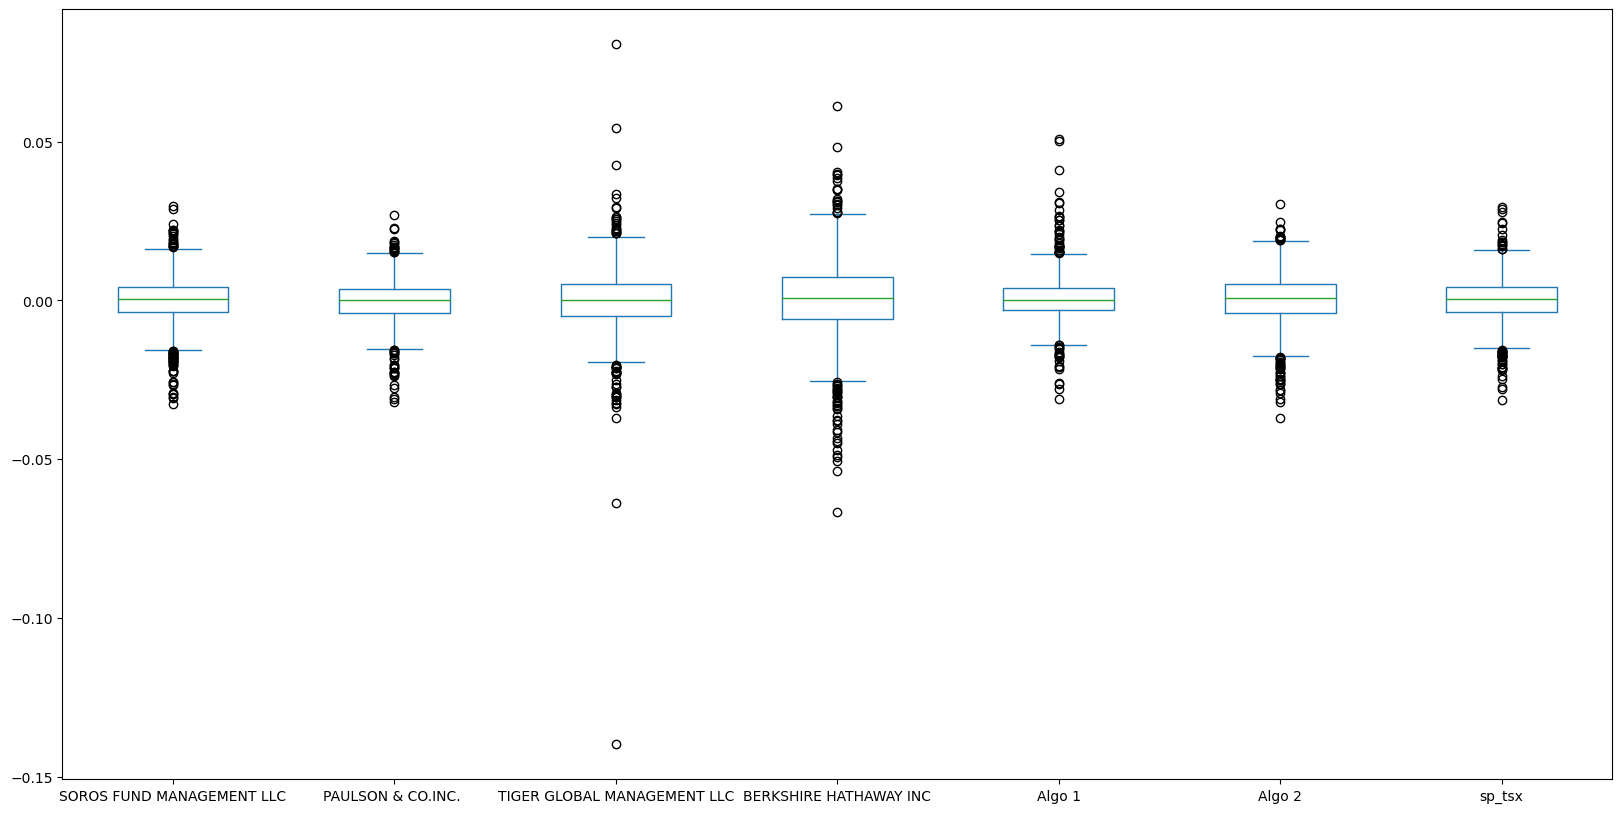

In [115]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [116]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
sp_tsx,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [125]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = df_daily_std[df_daily_std["std"] == df_daily_std.loc["sp_tsx", "std"]]
sp_tsx_std                          

,std
sp_tsx,0.007034


In [126]:
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp_tsx", "std"]]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [127]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
sp_tsx,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

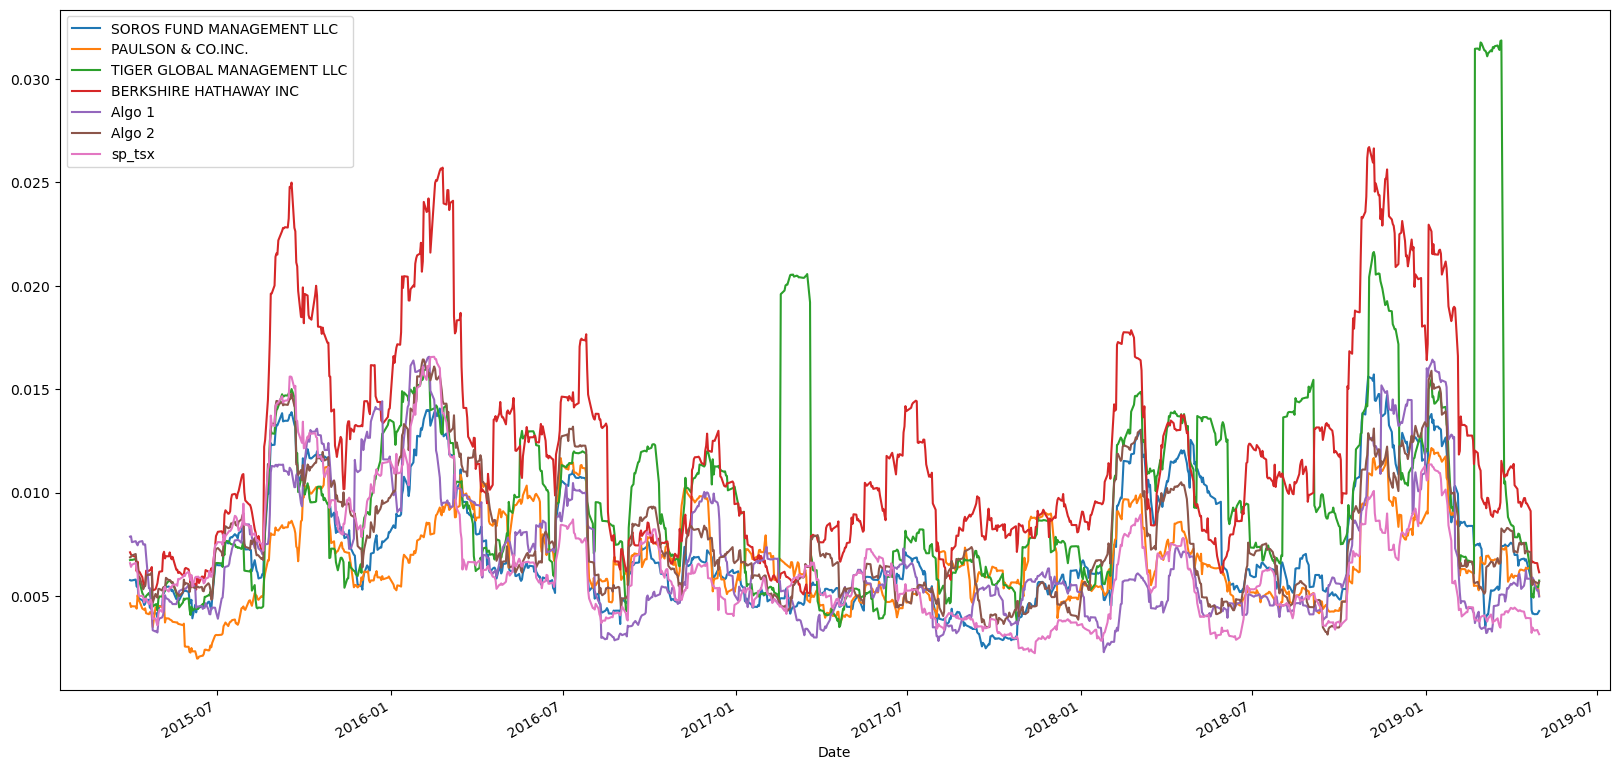

In [128]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_daily.rolling(window=21).std()
# Plot the rolling standard deviation
df_daily.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

In [135]:
# Calculate the correlation
combined_returns_correlation = df_daily.corr()
# Display de correlation matrix
combined_returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
sp_tsx,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

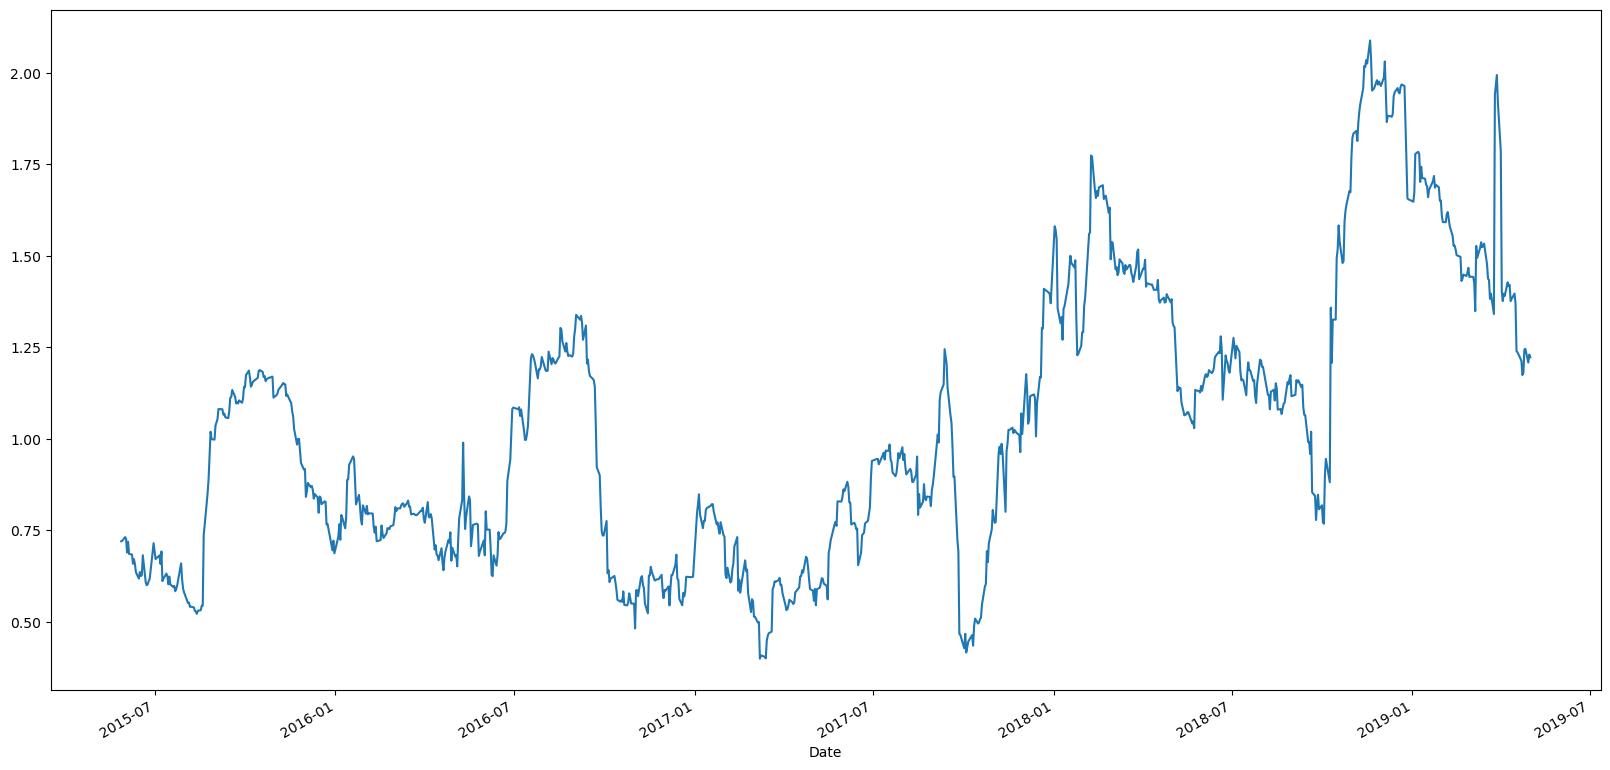

In [136]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp_tsx'])
rolling_variance = df_daily['sp_tsx'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

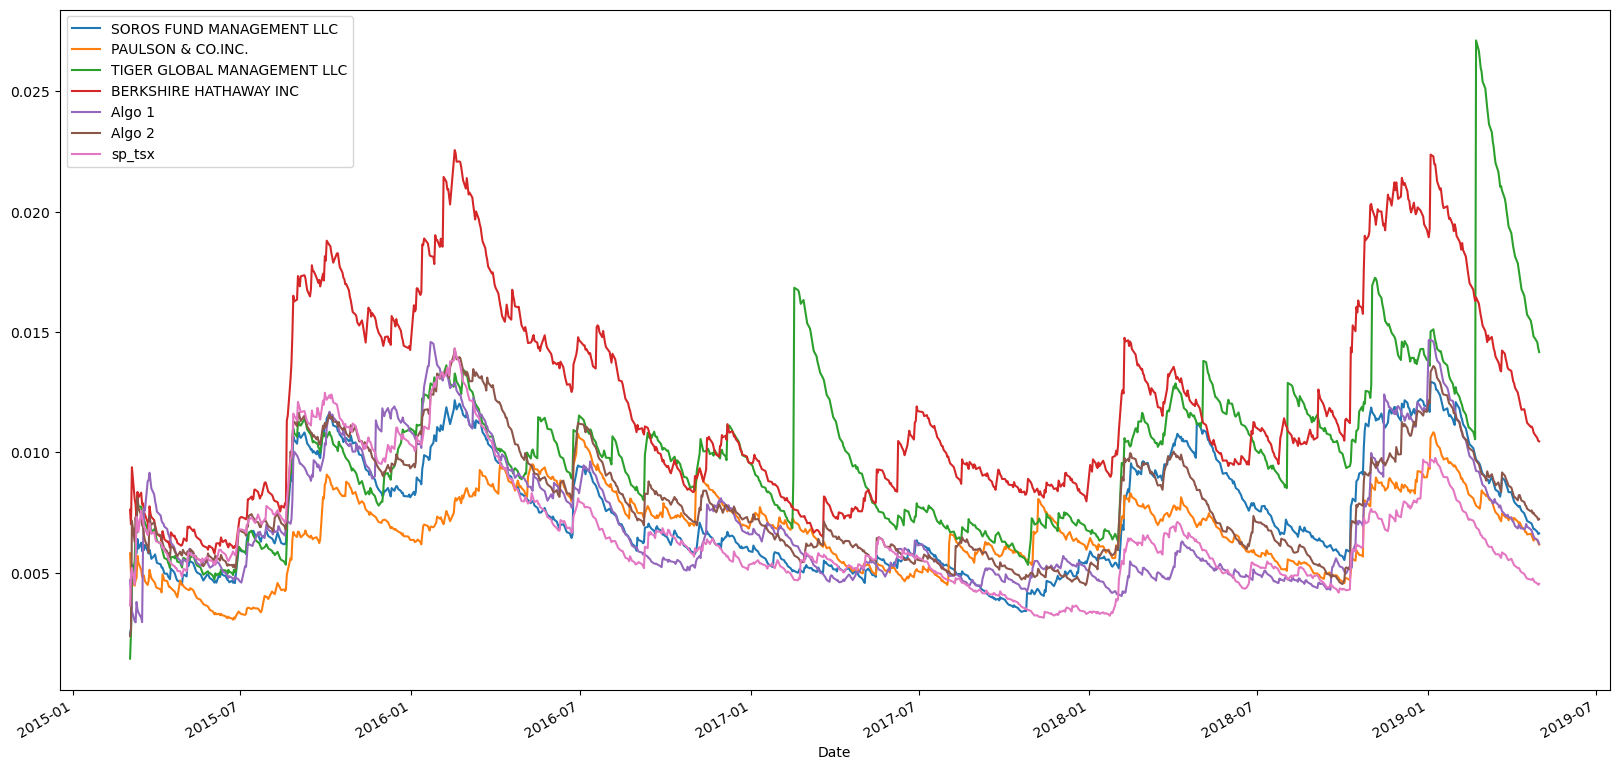

In [137]:
# Use `ewm` to calculate the rolling window
df_daily.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [138]:
# Annualized Sharpe Ratios
sharpe_ratio = ((df_daily.mean()*252)/(df_daily.std()*np.sqrt(252)))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp_tsx                         0.195550
dtype: float64

<AxesSubplot:>

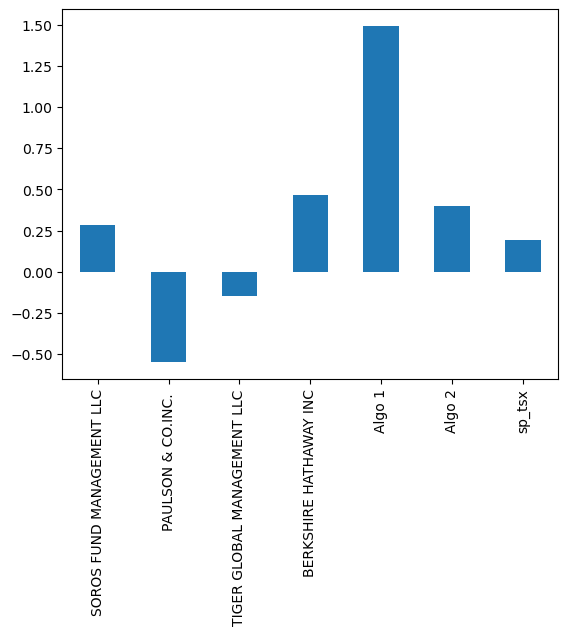

In [139]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [145]:
# Reading data from 1st stock 
l_history = pd.read_csv(Path("Resources/l_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
l_history.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [146]:
# Reading data from 2nd stock
otex_history = pd.read_csv(Path("Resources/otex_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
otex_history.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [147]:
# Reading data from 3rd stock
shop_history = pd.read_csv(Path("Resources/shop_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
shop_history.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [148]:
# Combine all stocks in a single DataFrame
comb_stocks = pd.concat((shop_history, otex_history, l_history), axis = 1, join= "inner")
comb_stocks.sort_index(ascending = True, inplace = True)
comb_stocks.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [149]:
# Reset Date index
comb_stocks = comb_stocks.reset_index()
comb_stocks.head()

,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
1,2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2,2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
3,2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
4,2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [150]:
# Reorganize portfolio data by having a column per symbol
comb_stocks = comb_stocks.drop(columns=["Symbol", "Symbol", "Symbol"])
comb_stocks.head()

,Date,Close,Close,Close
0,2018-01-02,132.06,43.58,57.99
1,2018-01-03,135.15,43.07,57.41
2,2018-01-04,137.46,42.91,57.42
3,2018-01-05,137.26,42.57,57.42
4,2018-01-08,139.51,42.16,56.86


In [151]:
columns = ["Date", "SHOP", "OTEX", "L"]
comb_stocks.columns = columns
comb_stocks.head()

,Date,SHOP,OTEX,L
0,2018-01-02,132.06,43.58,57.99
1,2018-01-03,135.15,43.07,57.41
2,2018-01-04,137.46,42.91,57.42
3,2018-01-05,137.26,42.57,57.42
4,2018-01-08,139.51,42.16,56.86


In [152]:
comb_stocks = comb_stocks.set_index("Date")
comb_stocks.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [153]:
# Calculate daily returns
daily_returns = comb_stocks.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()


,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [154]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [155]:
# Join your returns DataFrame to the original returns DataFrame
comb_returns = pd.concat([df_daily, portfolio_returns], axis="columns", join="inner")
comb_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
comb_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,my_portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [156]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comb_returns = comb_returns.dropna().copy()
comb_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,my_portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [157]:
# Calculate the annualized `std`
comb_returns_sd = comb_returns.std()
comb_returns_sd.head()

SOROS FUND MANAGEMENT LLC      0.009177
PAULSON & CO.INC.              0.007203
TIGER GLOBAL MANAGEMENT LLC    0.013848
BERKSHIRE HATHAWAY INC         0.014328
Algo 1                         0.007561
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

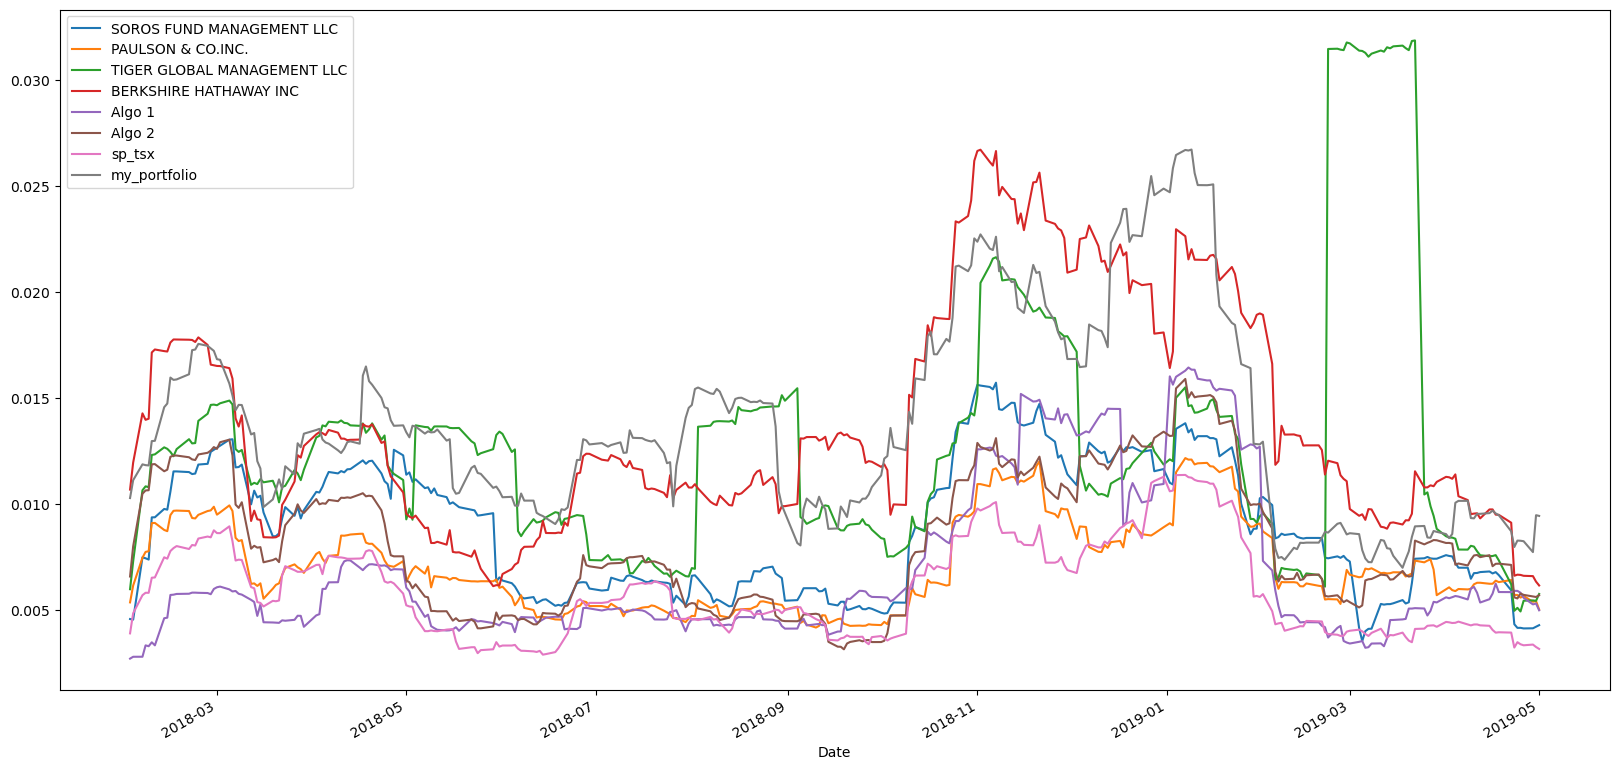

In [158]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
comb_returns.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

In [159]:
# Calculate and plot the correlation
comb_returns_correlation = comb_returns.corr()
comb_returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,my_portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
sp_tsx,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
my_portfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

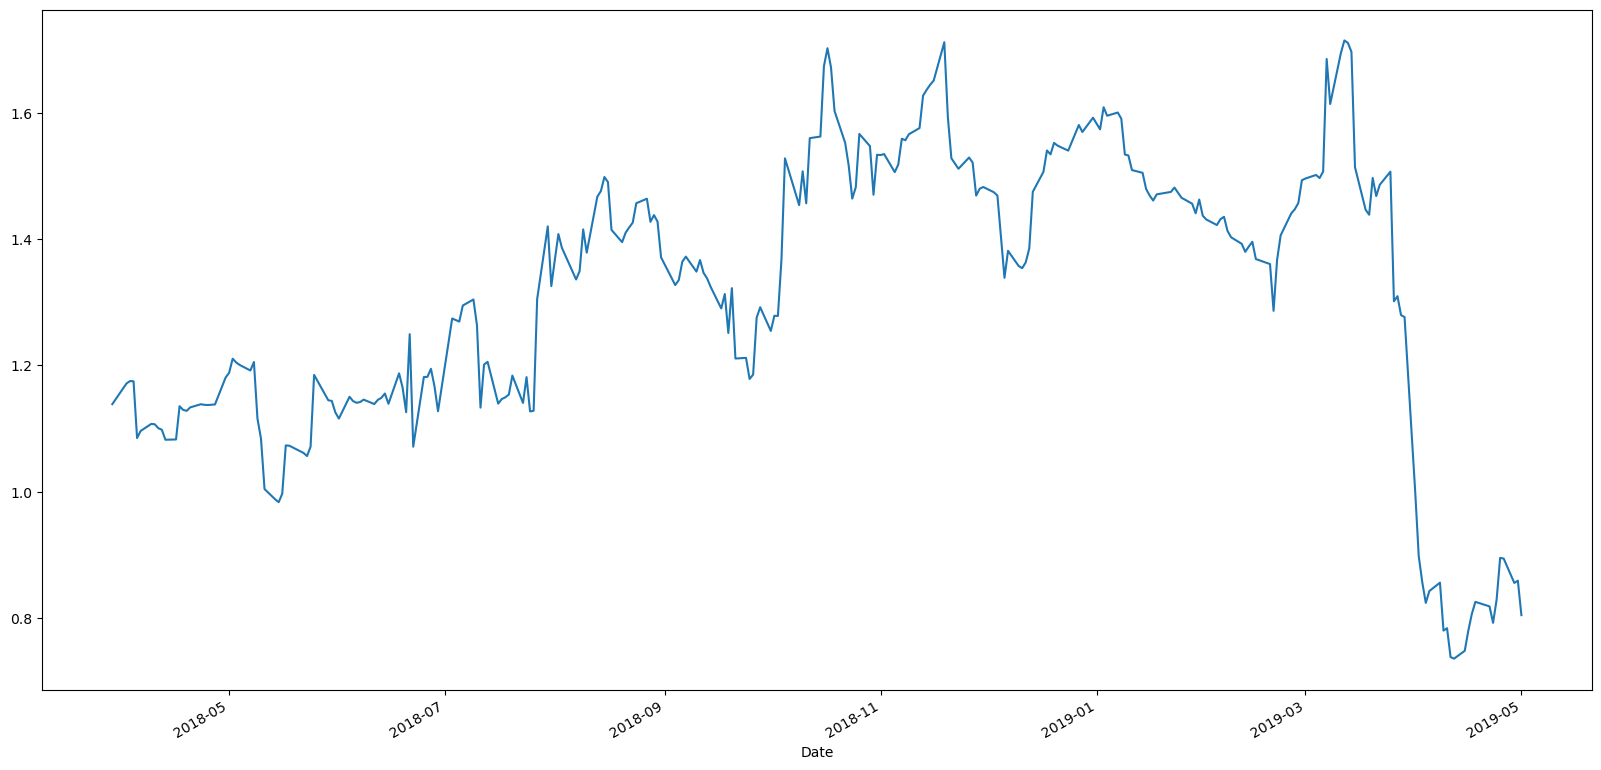

In [53]:
# Calculate and plot Beta
rolling_covariance = comb_returns['my_portfolio'].rolling(window=60).cov(comb_returns['sp_tsx'])
rolling_variance = comb_returns['sp_tsx'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [160]:
# Calculate Annualized Sharpe Ratios
trading_days = comb_returns.count()
sharpe_ratios = comb_returns.mean()*trading_days/(comb_returns.std()*np.sqrt(trading_days))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.100620
PAULSON & CO.INC.             -0.452106
TIGER GLOBAL MANAGEMENT LLC   -1.587651
BERKSHIRE HATHAWAY INC         0.223505
Algo 1                         2.169322
Algo 2                         0.024408
sp_tsx                         0.039532
my_portfolio                   1.784947
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios'}>

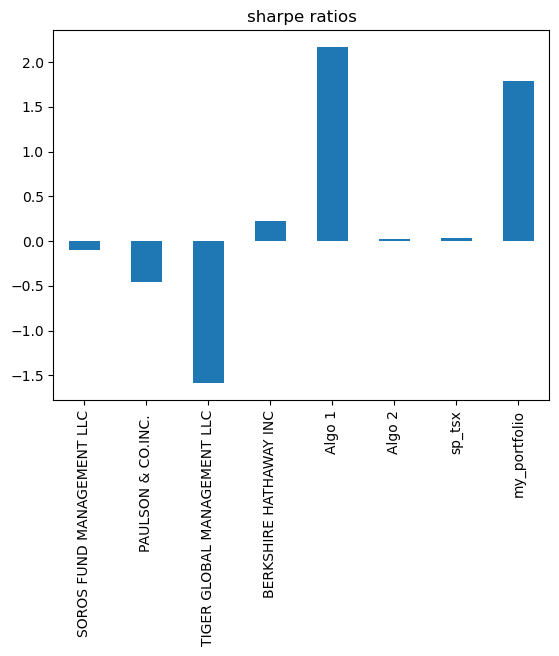

In [161]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
print(f"\nAs pe")